<a href="https://colab.research.google.com/github/Bryared/Trabajo-Encargado-LP2/blob/main/avance_lp2_chalan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

# Paso 1: Obtener los datos
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol=IBM&apikey=IHEB6GAC16MZIU36'
r = requests.get(url)
data = r.json()

# Paso 2: Extraer la sección relevante
raw_prices = data['Monthly Adjusted Time Series']

# Paso 3: Convertir a DataFrame
df = pd.DataFrame.from_dict(raw_prices, orient='index')

# Paso 4: Renombrar columnas
df.columns = ['open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'dividend']

# Paso 5: Convertir tipos de datos
df = df.astype(float)

# Paso 6: Convertir el índice (fechas)
df.index = pd.to_datetime(df.index)
df = df.sort_index()  # ordenar fechas de más antigua a más reciente

# Paso 7: Ver resultados
print(df.head())

# Paso 8: Guardar en CSV limpio
df.to_csv("datos_limpios_IBM.csv")


              open    high     low   close  adjusted_close       volume  \
1999-12-31  102.56  122.12  102.25  107.87         53.9775  158626300.0   
2000-01-31  112.44  124.75  109.62  112.25         56.1692  175259600.0   
2000-02-29  112.37  119.75  100.94  102.75         51.4674  133524400.0   
2000-03-31  102.00  128.25   99.50  118.37         59.2915  194329000.0   
2000-04-28  120.00  128.00  101.25  111.50         55.8503  168464800.0   

            dividend  
1999-12-31      0.00  
2000-01-31      0.00  
2000-02-29      0.12  
2000-03-31      0.00  
2000-04-28      0.00  


In [ ]:
import requests

# Reemplaza con tu API key válida
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol=AAPL&apikey=IHEB6GAC16MZIU36'

r = requests.get(url)
data = r.json()

print(data)


{'Meta Data': {'1. Information': 'Monthly Adjusted Prices and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2025-07-03', '4. Time Zone': 'US/Eastern'}, 'Monthly Adjusted Time Series': {'2025-07-03': {'1. open': '206.6650', '2. high': '214.6500', '3. low': '206.1401', '4. close': '213.5500', '5. adjusted close': '213.5500', '6. volume': '181686514', '7. dividend amount': '0.0000'}, '2025-06-30': {'1. open': '200.2800', '2. high': '207.3900', '3. low': '195.0700', '4. close': '205.1700', '5. adjusted close': '205.1700', '6. volume': '1100504397', '7. dividend amount': '0.0000'}, '2025-05-30': {'1. open': '209.0800', '2. high': '214.5600', '3. low': '193.2500', '4. close': '200.8500', '5. adjusted close': '200.8500', '6. volume': '1195889556', '7. dividend amount': '0.2600'}, '2025-04-30': {'1. open': '219.8050', '2. high': '225.1900', '3. low': '169.2101', '4. close': '212.5000', '5. adjusted close': '212.2382', '6. volume': '1607318483', '7. dividend amount': '0.0000'}, '2025-03-

💻 **Tecnología**

APPLE

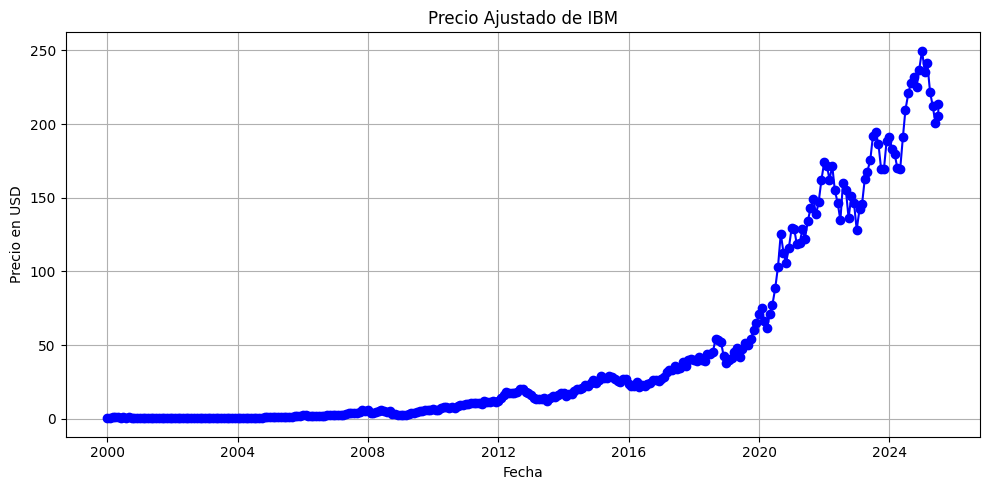

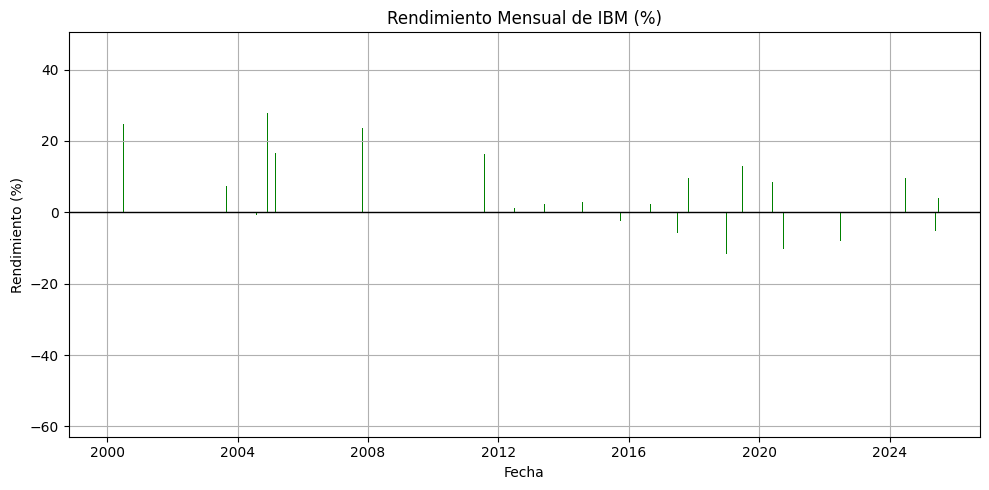

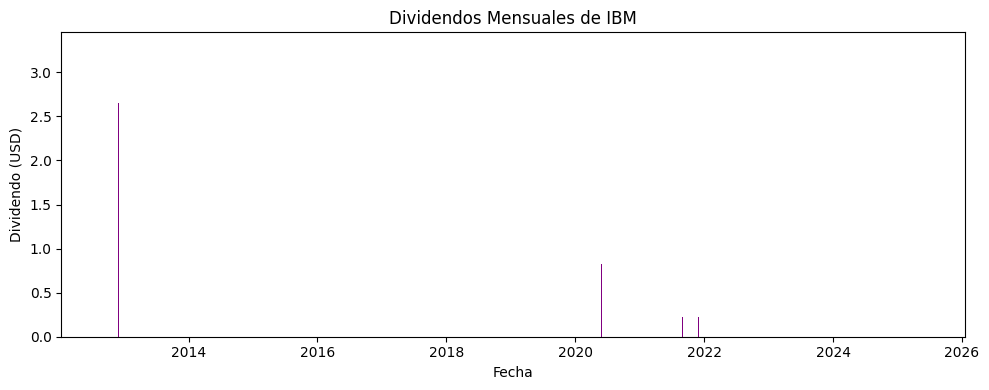

In [ ]:
import requestsimport pandas as pd
import matplotlib.pyplot as plt

# ========== 1. EXTRACCIÓN DE DATOS ==========
API_KEY = "IHEB6GAC16MZIU36"
symbol = "AAPL"
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol={symbol}&apikey={API_KEY}"

response = requests.get(url)
data = response.json()

# ========== 2. LIMPIEZA Y TRANSFORMACIÓN ==========
raw_data = data['Monthly Adjusted Time Series']

df = pd.DataFrame.from_dict(raw_data, orient='index')
df.columns = ['open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'dividend']
df = df.astype(float)
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Guardar datos limpios
df.to_csv(f'datos_limpios_{symbol}.csv')

# ========== 3. ANÁLISIS CUANTITATIVO ==========

# Rendimiento mensual (porcentaje de cambio)
df['return'] = df['adjusted_close'].pct_change() * 100

# Volatilidad mensual (desviación estándar móvil de 3 meses)
df['volatility'] = df['return'].rolling(3).std()

# Filtrar dividendos > 0
dividend_months = df[df['dividend'] > 0]

# ========== 4. VISUALIZACIÓN ==========

# Gráfico 1: Precio ajustado en el tiempo
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['adjusted_close'], marker='o', color='blue')
plt.title('Precio Ajustado de IBM')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_precio_ajustado.png')
plt.show()

# Gráfico 2: Rendimiento mensual
plt.figure(figsize=(10, 5))
plt.bar(df.index, df['return'], color='green')
plt.title('Rendimiento Mensual de IBM (%)')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento (%)')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_rendimiento_mensual.png')
plt.show()

# Gráfico 3: Dividendos recibidos
plt.figure(figsize=(10, 4))
plt.bar(dividend_months.index, dividend_months['dividend'], color='purple')
plt.title('Dividendos Mensuales de IBM')
plt.xlabel('Fecha')
plt.ylabel('Dividendo (USD)')
plt.tight_layout()
plt.savefig('grafico_dividendos.png')
plt.show()

NVIDIA

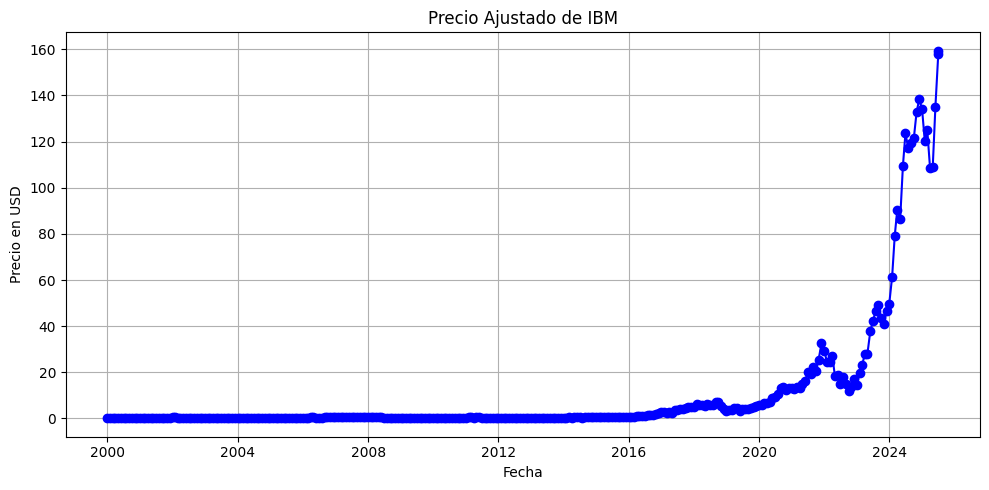

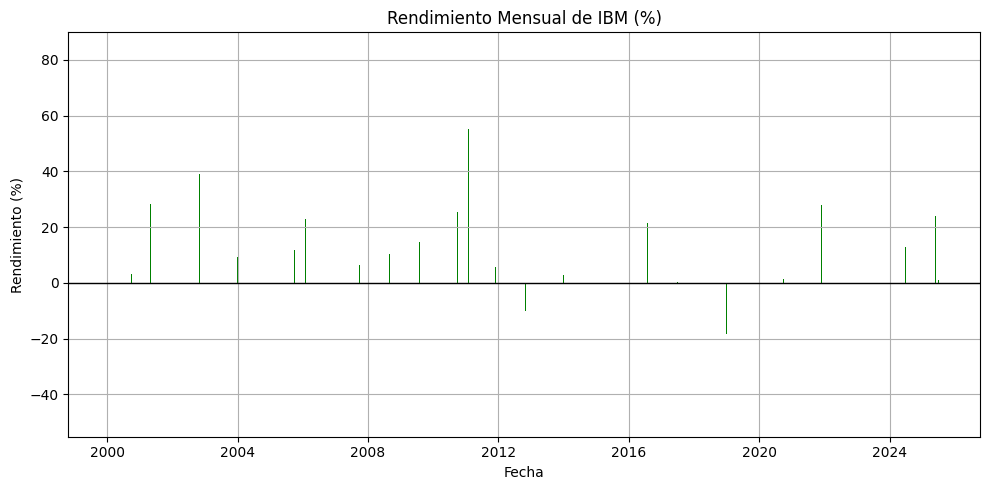

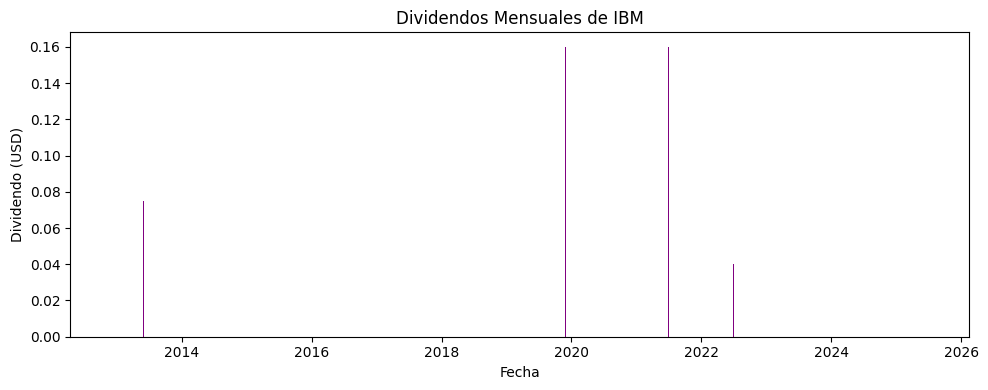

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# ========== 1. EXTRACCIÓN DE DATOS ==========
API_KEY = "IHEB6GAC16MZIU36"
symbol = "NVDA"
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol={symbol}&apikey={API_KEY}"

response = requests.get(url)
data = response.json()

# ========== 2. LIMPIEZA Y TRANSFORMACIÓN ==========
raw_data = data['Monthly Adjusted Time Series']

df = pd.DataFrame.from_dict(raw_data, orient='index')
df.columns = ['open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'dividend']
df = df.astype(float)
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Guardar datos limpios
df.to_csv(f'datos_limpios_{symbol}.csv')

# ========== 3. ANÁLISIS CUANTITATIVO ==========

# Rendimiento mensual (porcentaje de cambio)
df['return'] = df['adjusted_close'].pct_change() * 100

# Volatilidad mensual (desviación estándar móvil de 3 meses)
df['volatility'] = df['return'].rolling(3).std()

# Filtrar dividendos > 0
dividend_months = df[df['dividend'] > 0]

# ========== 4. VISUALIZACIÓN ==========

# Gráfico 1: Precio ajustado en el tiempo
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['adjusted_close'], marker='o', color='blue')
plt.title('Precio Ajustado de IBM')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_precio_ajustado.png')
plt.show()

# Gráfico 2: Rendimiento mensual
plt.figure(figsize=(10, 5))
plt.bar(df.index, df['return'], color='green')
plt.title('Rendimiento Mensual de IBM (%)')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento (%)')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_rendimiento_mensual.png')
plt.show()

# Gráfico 3: Dividendos recibidos
plt.figure(figsize=(10, 4))
plt.bar(dividend_months.index, dividend_months['dividend'], color='purple')
plt.title('Dividendos Mensuales de IBM')
plt.xlabel('Fecha')
plt.ylabel('Dividendo (USD)')
plt.tight_layout()
plt.savefig('grafico_dividendos.png')
plt.show()

MICROSOFT

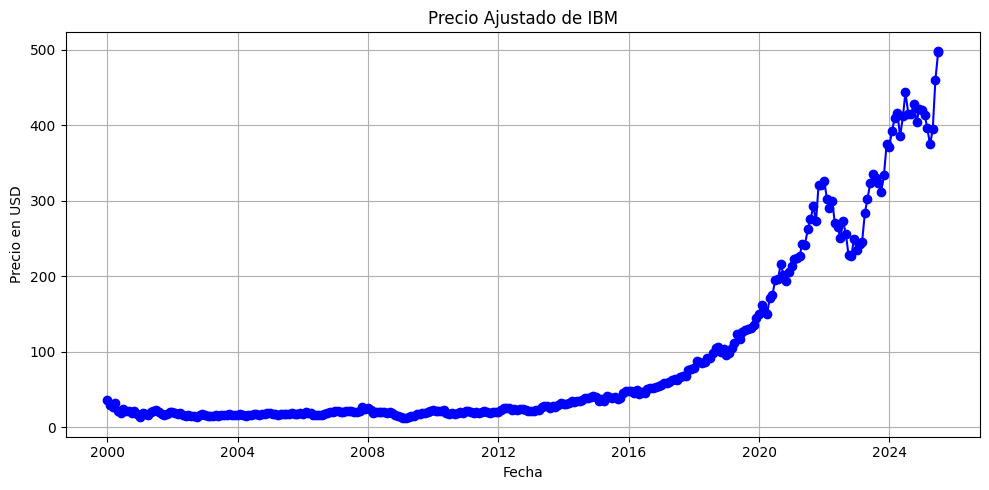

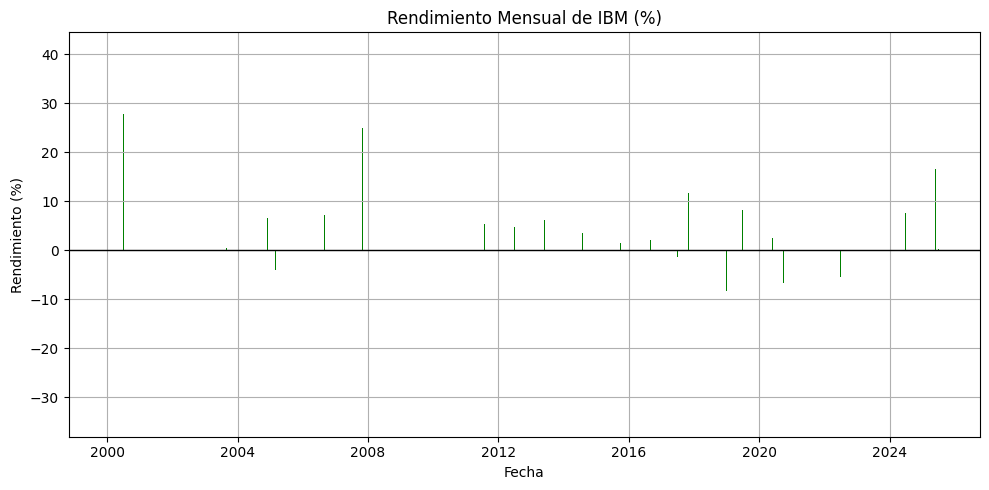

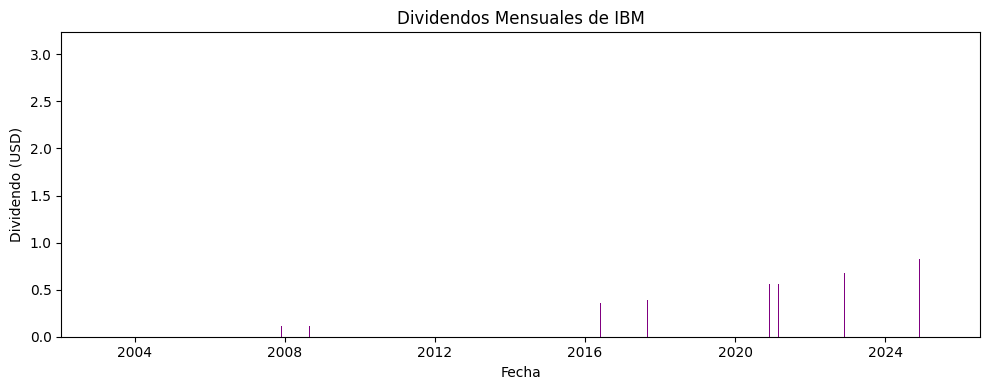

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# ========== 1. EXTRACCIÓN DE DATOS ==========
API_KEY = "IHEB6GAC16MZIU36"
symbol = "MSFT"
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol={symbol}&apikey={API_KEY}"

response = requests.get(url)
data = response.json()

# ========== 2. LIMPIEZA Y TRANSFORMACIÓN ==========
raw_data = data['Monthly Adjusted Time Series']

df = pd.DataFrame.from_dict(raw_data, orient='index')
df.columns = ['open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'dividend']
df = df.astype(float)
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Guardar datos limpios
df.to_csv(f'datos_limpios_{symbol}.csv')

# ========== 3. ANÁLISIS CUANTITATIVO ==========

# Rendimiento mensual (porcentaje de cambio)
df['return'] = df['adjusted_close'].pct_change() * 100

# Volatilidad mensual (desviación estándar móvil de 3 meses)
df['volatility'] = df['return'].rolling(3).std()

# Filtrar dividendos > 0
dividend_months = df[df['dividend'] > 0]

# ========== 4. VISUALIZACIÓN ==========

# Gráfico 1: Precio ajustado en el tiempo
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['adjusted_close'], marker='o', color='blue')
plt.title('Precio Ajustado de IBM')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_precio_ajustado.png')
plt.show()

# Gráfico 2: Rendimiento mensual
plt.figure(figsize=(10, 5))
plt.bar(df.index, df['return'], color='green')
plt.title('Rendimiento Mensual de IBM (%)')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento (%)')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_rendimiento_mensual.png')
plt.show()

# Gráfico 3: Dividendos recibidos
plt.figure(figsize=(10, 4))
plt.bar(dividend_months.index, dividend_months['dividend'], color='purple')
plt.title('Dividendos Mensuales de IBM')
plt.xlabel('Fecha')
plt.ylabel('Dividendo (USD)')
plt.tight_layout()
plt.savefig('grafico_dividendos.png')
plt.show()

In [15]:
import pandas as pd
import plotly.graph_objs as go

# Cargar CSVs
ibm = pd.read_csv("datos_limpios_MSFT.csv", parse_dates=["Unnamed: 0"])
aapl = pd.read_csv("datos_limpios_AAPL.csv", parse_dates=["Unnamed: 0"])
tsla = pd.read_csv("datos_limpios_TSLA.csv", parse_dates=["Unnamed: 0"])

# Renombrar columna de fechas
ibm.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
aapl.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
tsla.rename(columns={"Unnamed: 0": "Date"}, inplace=True)

# Establecer índice
ibm.set_index("Date", inplace=True)
aapl.set_index("Date", inplace=True)
tsla.set_index("Date", inplace=True)

# Tomar solo la columna de precios
ibm_price = ibm["adjusted_close"]
aapl_price = aapl["adjusted_close"]
tsla_price = tsla["adjusted_close"]

# Unir en un solo DataFrame
df = pd.concat([ibm_price, aapl_price, tsla_price], axis=1)
df.columns = ["IBM", "AAPL", "TSLA"]

# Calcular rendimiento porcentual acumulado desde el primer mes
df_norm = df / df.iloc[0] * 100  # 100% base inicial

# Crear gráfica interactiva
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_norm.index, y=df_norm["IBM"],
                         mode='lines', name='IBM'))
fig.add_trace(go.Scatter(x=df_norm.index, y=df_norm["AAPL"],
                         mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_norm.index, y=df_norm["TSLA"],
                         mode='lines', name='Tesla'))

fig.update_layout(
    title="Comparación de Rendimiento Porcentual Acumulado",
    xaxis_title="Fecha",
    yaxis_title="Rendimiento (%) desde inicio",
    hovermode="x unified",
    template="plotly_white"
)

fig.show()


In [11]:
!pip install plotly